<a href="https://colab.research.google.com/github/Auusi/Proyecto-Final-Big-Data/blob/main/Proyecto_final_MLBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga, estructurado y limpieza de datos

## Conectarse a Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importación de librerias

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from functools import reduce
from sklearn.cluster import KMeans
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

## Carga de Datasets y preparado de datos.

#### Libertad Económica - csv

In [ ]:
# El puntaje de Libertad Economica se basa en 5 areas de analisis.
# Área 1: Tamaño del gobierno - A medida que aumentan el gasto público, los impuestos y el tamaño de las empresas controladas por el gobierno,
# la toma de decisiones del gobierno es sustituida por la elección individual y la libertad económica se reduce.

# Área 2: Sistema legal y derechos de propiedad - La protección de las personas y sus bienes legítimamente adquiridos es un elemento central tanto de
# la libertad económica como de la sociedad civil. De hecho, es la función más importante del gobierno.

# Área 3: Dinero sólido - La inflación erosiona el valor de los salarios y ahorros ganados legítimamente.
# Por lo tanto, el dinero sólido es esencial para proteger los derechos de propiedad. Cuando la inflación no solo es alta, sino también volátil,
# se vuelve difícil para las personas planificar el futuro y, por lo tanto, utilizar la libertad económica de manera efectiva.

# Área 4: Libertad para comerciar internacionalmente - La libertad de intercambio, en su sentido más amplio, comprar, vender, hacer contratos, etc.,
# es esencial para la libertad económica, que se reduce cuando la libertad de intercambio no incluye a las empresas y a los individuos de
# otras naciones.

# Área 5: Regulación - Los gobiernos no solo utilizan una serie de herramientas para limitar el derecho a intercambiar internacionalmente,
# sino que también pueden desarrollar regulaciones onerosas que limitan el derecho a intercambiar, obtener crédito, contratar o trabajar para
# quien usted desee, o operar libremente su negocio.

# Carga y creación de dataframe
ruta_de_archivo = '/content/drive/MyDrive/libertadeconomica.csv'
dataframeLibertadEconomica = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_le = dataframeLibertadEconomica.copy()

# Diccionario que se utiliza para cambiar los nombres de las columnas
nuevos_nombres = {
    'countries': 'Paises',
    'ECONOMIC FREEDOM': "Libertad Economica"}
# Renombrar las columnas en el DataFrame
df_le.rename(columns=nuevos_nombres, inplace=True)

# Filtrar las filas donde 'year' sea igual a 2016
df_le = df_le[df_le['year'] == 2016]

# Seleccionar columnas de interés
df_le = df_le[['Paises', 'Libertad Economica']]

# Convertir valores nulos a NaN
df_le.replace('Datos nulos', np.nan, inplace=True)
# Eliminar filas con NaN
df_le = df_le.dropna()

df_le.head()

,Paises,Libertad Economica
0,Albania,7.54
1,Algeria,4.99
2,Angola,5.17
3,Argentina,4.84
4,Armenia,7.57


#### Felicidad global - csv

In [ ]:
# Carga y creación de dataframe
ruta_de_archivo = '/content/drive/MyDrive/world-happiness-report-2021.csv'
dataframeFelicidad = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_f = dataframeFelicidad.copy()

# Diccionario que se utiliza para cambiar los nombres de las columnas
nuevos_nombres = {
    'ï»¿Country name': 'Paises',
    'Ladder score': 'Felicidad'}
# Renombrar las columnas en el DataFrame
df_f.rename(columns=nuevos_nombres, inplace=True)

# Seleccionar columnas de interés
df_f= df_f[['Paises', 'Felicidad']]

# Convertir valores nulos a NaN
df_f.replace('Datos nulos', np.nan, inplace=True)
# Eliminar filas con NaN
df_f= df_f.dropna()

# Creación dataframes útiles
df_f_sorted = df_f.sort_values(by='Felicidad')
df_f_head = df_f_sorted.head(5)
df_f_tail = df_f_sorted.tail(5)

# Concatenar los DataFrames
df_f_dif= pd.concat([df_f_head , df_f_tail], ignore_index=True)

df_f.head()

,Paises,Felicidad
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464


#### Experanza de vida - csv

In [ ]:
# La esperanza de vida es una medida estadística del tiempo promedio que se espera que viva un organismo

# Carga y creación de dataframe
ruta_de_archivo = '/content/drive/MyDrive/Lifeexpectancy.csv'
dataframeEsperanzaVida = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_ev = dataframeEsperanzaVida.copy()

# Diccionario que se utiliza para cambiar los nombres de las columnas
nuevos_nombres = {
    'Country': 'Paises',
    'Life expectancy': 'Esperanza de vida'}
# Renombrar las columnas en el DataFrame
df_ev.rename(columns=nuevos_nombres, inplace=True)

# Seleccionar columnas de interés
df_ev= df_ev[['Paises', 'Esperanza de vida']]

# Convertir valores nulos a NaN
df_ev.replace('Datos nulos', np.nan, inplace=True)
# Eliminar filas con NaN
df_ev= df_ev.dropna()

df_ev.head()

,Paises,Esperanza de vida
0,Afghanistan,64.5
1,Algeria,76.7
2,Andorra,81.8
3,Angola,60.8
4,Antigua and Barbuda,76.9


#### PBI per capita - csv

In [ ]:
# Una lista de países del mundo por producto interno bruto (en paridad de poder adquisitivo) per cápita,
# es decir, el valor de paridad de poder adquisitivo (PPA) de todos los bienes y servicios finales producidos dentro de un país en un año determinado.

# Carga y creación de dataframe
ruta_de_archivo = '/content/drive/MyDrive/PBIpercapita.csv'
dataframePBIpercapita = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_pbi = dataframePBIpercapita.copy()

# Diccionario que se utiliza para cambiar los nombres de las columnas
nuevos_nombres = {
    'Country': 'Paises',
    'GDP per capita': 'PBI'}
# Renombrar las columnas en el DataFrame
df_pbi.rename(columns=nuevos_nombres, inplace=True)

# Seleccionar columnas de interés
df_pbi= df_pbi[['Paises', 'PBI']]

# Convertir valores nulos a NaN
df_pbi.replace('Datos nulos', np.nan, inplace=True)
# Eliminar filas con NaN
df_pbi= df_pbi.dropna()

# Creación dataframes útiles
df_pbi_ordenado = df_pbi.sort_values(by='PBI', ascending=False)

# Obtener los 5 países con mas y menos PBI
top10_PBI = df_pbi_ordenado.head(10)
bottom10_PBI = df_pbi_ordenado.tail(10)

# Concatenar ambos DataFrames para obtener uno nuevo con los resultados
df_difPBI = pd.concat([top10_PBI, bottom10_PBI])

df_pbi.head()

,Paises,PBI
0,Afghanistan,2182.0
1,Albania,14866.0
2,Algeria,16091.0
3,Angola,6763.0
4,Antigua and Barbuda,30593.0


#### Tasa suicidio - csv

In [ ]:
# Esta lista de países contiene la tasa de suicidios según los datos publicados por la Organización Mundial de la Salud (OMS).

# Carga y creación de dataframe
ruta_de_archivo = '/content/drive/MyDrive/Suicide rate.csv'
dataframeSuicidios = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_s = dataframeSuicidios.copy()

# Diccionario que se utiliza para cambiar los nombres de las columnas
nuevos_nombres = {
    'Country': 'Paises',
    'Suicide rate': 'Ratio de suicidios'}
# Renombrar las columnas en el DataFrame
df_s .rename(columns=nuevos_nombres, inplace=True)

# Seleccionar columnas de interés
df_s = df_s [['Paises', 'Ratio de suicidios']]

# Convertir valores nulos a NaN
df_s.replace('Datos nulos', np.nan, inplace=True)
# Eliminar filas con NaN
df_s= df_s.dropna()

df_s.head()

,Paises,Ratio de suicidios
0,Afghanistan,6.4
1,Albania,5.6
2,Algeria,3.3
3,Angola,8.9
4,Antigua and Barbuda,0.5


#### Educación global - csv

In [ ]:
# Carga y creación de dataframe
ruta_de_archivo = '/content/drive/MyDrive/Global_Education.csv'
dataframeEducacionGlobal = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_eg = dataframeEducacionGlobal.copy ()

# Diccionario de traducción de nombres de columnas
nuevos_nombres = {
    'Countries and areas': 'Paises',
    'OOSR_Pre0Primary_Age_Male': 'Tasa No Escolarización Preescolar (Varones)',
    'OOSR_Pre0Primary_Age_Female': 'Tasa No Escolarización Preescolar (Mujeres)',
    'OOSR_Primary_Age_Male': 'Tasa No Escolarización Primaria (Varones)',
    'OOSR_Primary_Age_Female': 'Tasa No Escolarización Primaria (Mujeres)',
    'OOSR_Lower_Secondary_Age_Male': 'Tasa No Escolarización Primer Ciclo Secundaria (Varones)',
    'OOSR_Lower_Secondary_Age_Female': 'Tasa No Escolarización Primer Ciclo Secundaria (Mujeres)',
    'OOSR_Upper_Secondary_Age_Male': 'Tasa No Escolarización Segundo Ciclo Secundaria (Varones)',
    'OOSR_Upper_Secondary_Age_Female': 'Tasa No Escolarización Segundo Ciclo Secundaria (Mujeres)',
    'Completion_Rate_Primary_Male': 'Tasa Finalización Educación Primaria (Varones)',
    'Completion_Rate_Primary_Female': 'Tasa Finalización Educación Primaria (Mujeres)',
    'Completion_Rate_Lower_Secondary_Male': 'Tasa Finalización Primer Ciclo Secundaria (Varones)',
    'Completion_Rate_Lower_Secondary_Female': 'Tasa Finalización Primer Ciclo Secundaria (Mujeres)',
    'Completion_Rate_Upper_Secondary_Male': 'Tasa Finalización Segundo Ciclo Secundaria (Varones)',
    'Completion_Rate_Upper_Secondary_Female': 'Tasa Finalización Segundo Ciclo Secundaria (Mujeres)',
    'Unemployment_Rate': 'Tasa Desempleo'}
# Renombrar las columnas en el DataFrame
df_eg.rename(columns=nuevos_nombres, inplace=True)

# Seleccionar columnas de interés
df_eg = df_eg[['Paises', 'Tasa No Escolarización Preescolar (Varones)',
               'Tasa No Escolarización Preescolar (Mujeres)','Tasa No Escolarización Primaria (Varones)',
               'Tasa No Escolarización Primaria (Mujeres)','Tasa No Escolarización Primer Ciclo Secundaria (Varones)',
               'Tasa No Escolarización Primer Ciclo Secundaria (Mujeres)',
               'Tasa No Escolarización Segundo Ciclo Secundaria (Varones)',
               'Tasa No Escolarización Segundo Ciclo Secundaria (Varones)',
               'Tasa No Escolarización Segundo Ciclo Secundaria (Mujeres)',
               'Tasa Finalización Educación Primaria (Varones)',
               'Tasa Finalización Educación Primaria (Mujeres)',
               'Tasa Finalización Primer Ciclo Secundaria (Varones)',
               'Tasa Finalización Primer Ciclo Secundaria (Mujeres)',
               'Tasa Finalización Segundo Ciclo Secundaria (Varones)',
               'Tasa Finalización Segundo Ciclo Secundaria (Mujeres)',
               'Tasa Desempleo']]

# Convertir valores nulos a NaN
df_eg.replace('Datos nulos', np.nan, inplace=True)
# Eliminar filas con NaN
df_eg = df_eg.dropna()

df_eg.tail()

,Paises,Tasa No Escolarización Preescolar (Varones),Tasa No Escolarización Preescolar (Mujeres),Tasa No Escolarización Primaria (Varones),Tasa No Escolarización Primaria (Mujeres),Tasa No Escolarización Primer Ciclo Secundaria (Varones),Tasa No Escolarización Primer Ciclo Secundaria (Mujeres),Tasa No Escolarización Segundo Ciclo Secundaria (Varones),Tasa No Escolarización Segundo Ciclo Secundaria (Varones),Tasa No Escolarización Segundo Ciclo Secundaria (Mujeres),Tasa Finalización Educación Primaria (Varones),Tasa Finalización Educación Primaria (Mujeres),Tasa Finalización Primer Ciclo Secundaria (Varones),Tasa Finalización Primer Ciclo Secundaria (Mujeres),Tasa Finalización Segundo Ciclo Secundaria (Varones),Tasa Finalización Segundo Ciclo Secundaria (Mujeres),Tasa Desempleo
197,Venezuela,14,14,10,10,15,13,28,28,19,0,0,0,0,0,0,8.80
198,Vietnam,0,0,0,0,0,0,0,0,0,96,97,81,87,50,61,2.01
199,Yemen,96,96,10,21,23,34,46,46,68,70,55,55,39,37,23,12.91
200,Zambia,0,0,17,13,0,0,0,0,0,71,73,54,50,33,27,11.43
201,Zimbabwe,60,58,0,0,0,0,45,45,50,86,92,45,53,17,14,4.95


##Funciones para graficar

In [ ]:
def create_choropleth(df, location_column, z_column, title, colorbar_title, zmin=None, zmax=None):
    data = go.Choropleth(
        locations=df[location_column],
        locationmode='country names',
        z=df[z_column],
        colorscale='Viridis',
        colorbar={'title': colorbar_title}
    )

    fig = go.Figure(data=[data])
    fig.update_geos(projection_type='natural earth')
    fig.update_layout(
        title_text=title,
        geo=dict(showframe=False, coastlinecolor='white', showcoastlines=True)
    )

    if zmin is not None:
        fig.update_traces(zmin=zmin)

    if zmax is not None:
        fig.update_traces(zmax=zmax)

    return fig


# Función para graficar varios
def create_multi_choropleth(df, location_column, z_column, title, colorbar_title, zmin=None, zmax=None):
    data = go.Choropleth(
        locations=df[location_column],
        locationmode='country names',
        z=df[z_column],
        colorscale='Viridis',
        colorbar={'title': colorbar_title},
        zmin=zmin,
        zmax=zmax,
        hoverinfo='location+z'

    )

    return data


def plot_top_n_countries(df, x_column, y_column, n=10, top=True, colorscale='Viridis', horizontal=False, custom_title=None, zmin=None, zmax=None):
    """
    Crea un gráfico interactivo de barras con los países de mayor o menor libertad económica.

    Parameters:
    - df: DataFrame que contiene las columnas 'x_column' y 'y_column'.
    - x_column: Nombre de la columna que se utilizará en el eje x.
    - y_column: Nombre de la columna que se utilizará en el eje y.
    - n: Número de países a incluir en el gráfico (por defecto, 10).
    - top: Booleano que indica si se deben seleccionar los países con mayor libertad (True) o menor libertad (False).
    - colorscale: Escala de colores para el gráfico (por defecto, 'Viridis').
    - horizontal: Booleano que indica si se deben mostrar las barras en horizontal (True) o vertical (False).
    - custom_title: Título personalizado para el gráfico (opcional).
    - zmin: Valor mínimo para la barra de colores.
    - zmax: Valor máximo para la barra de colores.
    """
    # Ordenar el DataFrame por la columna 'y_column' según el parámetro 'top'
    df_top = df.sort_values(by=y_column, ascending=not top).head(n)

    if horizontal:
        # Si es horizontal, invertir el orden de las barras
        df_top = df_top.iloc[::-1]

    # Crear el gráfico interactivo de barras con Plotly Express
    title_prefix = 'Mayor' if top else 'Menor'

    if custom_title:
        title = custom_title
    else:
        title = f'Top {n} países con {title_prefix} {y_column}'

    if horizontal:
        # Mostrar las barras en horizontal
        fig = px.bar(df_top, x=y_column, y=x_column,
                     title=title,
                     labels={y_column: y_column, x_column: x_column},
                     height=600,
                     color=y_column,  # Agregar color a la barra según la columna y
                     color_continuous_midpoint=df_top[y_column].median(),  # Utilizar la escala de colores proporcionada
                     color_continuous_scale=colorscale,
                     range_color=[zmin, zmax] if zmin is not None and zmax is not None else None)  # Configurar el rango de la barra de color
    else:
        # Mostrar las barras en vertical (predeterminado)
        fig = px.bar(df_top, x=x_column, y=y_column,
                     title=title,
                     labels={y_column: y_column, x_column: x_column},
                     height=600,
                     color=y_column,  # Cambiar a la columna y para la escala de colores
                     color_continuous_midpoint=df_top[y_column].median(),
                     color_continuous_scale=colorscale,
                     range_color=[zmin, zmax] if zmin is not None and zmax is not None else None)  # Configurar el rango de la barra de color

    # Mostrar el gráfico
    fig.show()


def create_sunburst_chart(df, path_columns, title, color_column=None, color_scale=None):
    # Crear el gráfico Sunburst
    fig = px.sunburst(df, path=path_columns, title=title, color=color_column, color_continuous_scale=color_scale)

    # Actualizar el diseño del gráfico
    fig.update_layout(
        title=title,
        margin=dict(t=30, l=0, r=0, b=0)
    )

    fig.update_traces(
        hovertemplate='%{label}<extra></extra>'
    )

    fig.update_coloraxes(showscale=False)

    fig.show()



def create_choropleth_map(df, cluster_column, num_clusters, title, tickvals, ticktext):
  fig = px.choropleth(df,
                      locations='Paises',
                      locationmode='country names',
                      color=cluster_column,
                      projection='orthographic',
                      title=title,
                      color_continuous_scale='sunset')

  fig.update_geos(center=dict(lon=0, lat=0))
  fig.update_coloraxes(colorbar=dict(tickvals=tickvals, ticktext=ticktext, title='Cluster'))
  fig.update_traces(hovertemplate='%{location}<br>Cluster: %{z}')

  return fig

# Gráficos

#### Libertad económica - gráfico


In [ ]:
fig_economic_freedom = create_choropleth(df_le, 'Paises', 'Libertad Economica', 'Mapa de Libertad Económica','Puntaje',zmax=8,zmin=2)
fig_economic_freedom.data[0].colorscale = 'Inferno'
fig_economic_freedom.show()

In [ ]:
plot_top_n_countries(df_le, 'Paises', 'Libertad Economica', n=10,  colorscale="Inferno")

In [ ]:
plot_top_n_countries(df_le, 'Paises', 'Libertad Economica', n=10, top=False, colorscale="Inferno", horizontal=True)

#### Felicidad - gráfico

In [ ]:
fig_happines = create_choropleth(df_f, 'Paises', 'Felicidad', 'Mapa de la Felicidad', 'Puntaje')
fig_happines.data[0].colorscale = 'RdBu'
fig_happines.show()

In [ ]:
plot_top_n_countries(df_f_dif, 'Paises', 'Felicidad', n=10, top=False, colorscale="RdBu", horizontal=True, custom_title="Diferencia de Felicidad")

#### Esperanza de vida - gráfico

In [ ]:
fig_life_expectancy = create_choropleth(df_ev, 'Paises', 'Esperanza de vida', 'Mapa de Esperanza de vida', 'Años',zmax=85,zmin=50)
fig_life_expectancy.show()

In [ ]:
plot_top_n_countries(df_ev, 'Paises', 'Esperanza de vida', n=25, colorscale="Viridis", horizontal=True)

#### PBI per capita - gráfico

In [ ]:
fig_pbi_per_capita = create_choropleth(df_pbi, 'Paises', 'PBI', 'Mapa de PBI', 'PBI Per Capita',zmax=70000,zmin=2000)
fig_pbi_per_capita .data[0].colorscale = 'Magma'
fig_pbi_per_capita.show()

In [ ]:
plot_top_n_countries(df_difPBI, 'Paises', 'PBI', n=20, colorscale="Magma", custom_title="Diferencia de PBI", zmin=0, zmax=100000)

#### Ratio de suicidios - gráfico

In [ ]:
fig_suicidios = create_choropleth(df_s, 'Paises', 'Ratio de suicidios', 'Mapa de Ratio de Suicidios', 'Suicidios c/100k Habitantes')
fig_suicidios.data[0].colorscale = 'YlGnBu'
fig_suicidios.show()

#### Escolarización por niveles - gráfico

In [ ]:
# Crear subgráficos con tasas de no escolarización por nivel
niveles_educacion = ['Preescolar', 'Primaria', 'Primer Ciclo Secundaria', 'Segundo Ciclo Secundaria']
num_filas = 2

fig = make_subplots(rows=num_filas, cols=len(niveles_educacion) // num_filas,
                    subplot_titles=[f'{nivel} ' for nivel in niveles_educacion],
                    specs=[[{'type': 'choropleth'}] * (len(niveles_educacion) // num_filas) for _ in range(num_filas)])

colorbar_title = "Tasa de No Escolarización %"
zmin = 0  # Valor mínimo para la barra de colores
zmax = 100  # Valor máximo para la barra de colores

for i, nivel in enumerate(niveles_educacion, start=1):  # Calculamos la tasa de no escolarización media entre varones y mujeres
    columna_varones = f'Tasa No Escolarización {nivel} (Varones)'
    columna_mujeres = f'Tasa No Escolarización {nivel} (Mujeres)'
    df_eg[f'Tasa No Escolarización {nivel} (Media)'] = df_eg[[columna_varones, columna_mujeres]].mean(axis=1)

    df_filtered = df_eg[df_eg[f'Tasa No Escolarización {nivel} (Media)'] > 0]
    df_sorted = df_filtered.sort_values(by=f'Tasa No Escolarización {nivel} (Media)', ascending=False)

    if not df_sorted.empty:
        data = create_multi_choropleth(df_sorted, 'Paises', f'Tasa No Escolarización {nivel} (Media)',
                                       f'Tasas de No Escolarización {nivel}', colorbar_title, zmin, zmax,)
        data.colorscale = 'YlOrRd'
        row = (i - 1) % num_filas + 1
        col = (i - 1) // num_filas + 1
        fig.add_trace(data, row=row, col=col)

fig.update_geos(projection_type='natural earth')
fig.update_layout(
    height=800,
    width=1400,
    title_text="Tasas de No Escolarización por Nivel"
)
fig.show()

In [ ]:
# Crear subgráficos con tasas de finalización por nivel
niveles_educacion = ['Educación Primaria', 'Primer Ciclo Secundaria', 'Segundo Ciclo Secundaria']
num_filas = 3

fig = make_subplots(rows=num_filas, cols=len(niveles_educacion) // num_filas,
                    subplot_titles=[f'{nivel}' for nivel in niveles_educacion],
                    specs=[[{'type': 'choropleth'}] * (len(niveles_educacion) // num_filas) for _ in range(num_filas)])

colorbar_title = "Tasa Finalización %"
zmin = 0  # Valor mínimo para la barra de colores
zmax = 100  # Valor máximo para la barra de colores

for i, nivel in enumerate(niveles_educacion, start=1):  # Calculamos la tasa de no escolarización media entre varones y mujeres
    columna_varones = f'Tasa Finalización {nivel} (Varones)'
    columna_mujeres = f'Tasa Finalización {nivel} (Mujeres)'
    df_eg[f'Tasa Finalización {nivel} (Media)'] = df_eg[[columna_varones, columna_mujeres]].mean(axis=1)

    df_filtered = df_eg[df_eg[f'Tasa Finalización {nivel} (Media)'] > 0]
    df_sorted = df_filtered.sort_values(by=f'Tasa Finalización {nivel} (Media)', ascending=False)

    if not df_sorted.empty:
        data = create_multi_choropleth(df_sorted, 'Paises', f'Tasa Finalización {nivel} (Media)',
                                       f'Tasas de Finalización {nivel}', colorbar_title, zmin, zmax)
        data.colorscale = 'Greens'
        row = (i - 1) % num_filas + 1
        col = ((i - 1) // num_filas) % (len(niveles_educacion) // num_filas) + 1
        fig.add_trace(data, row=row, col=col)

fig.update_geos(projection_type='natural earth')
fig.update_layout(
    height=1000,
    width=1200,
    title_text="Tasas de Finalización por Nivel"
)

fig.show()

#### Desempleo - gráfico

In [ ]:
fig_tasa_desempleo = create_choropleth(df_eg, 'Paises', 'Tasa Desempleo', 'Tasa Desempleo', 'Porcentaje %')
fig_tasa_desempleo.data[0].colorscale = 'Reds'
fig_tasa_desempleo.show()

# Clustering

## Preparación de datos para clustering

In [ ]:
# Lista de dataframes

df_desempleo = df_eg[['Paises','Tasa Desempleo']] # Nos quedamos solo con el Desempleo en el dataframe de Educacion Global, porque los datos de Escolarizacion tienen pocos paises registrados y para
                                                  # el clustering queriamos abarcar la mayor cantidad de naciones.


dataframes = [df_le, df_f, df_desempleo , df_pbi, df_ev, df_s] # Clusterizamos segun Libertad Economica, Felicidad, Desempleo, PBI, Esperanza de vida y Tasa de Suicidios.

# Utilizar la función reduce y merge para combinar dataframes en base a 'Paises'
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Paises', how='inner'), dataframes)
merged_df = merged_df.drop_duplicates(subset=['Paises'])

merged_df.head()


,Paises,Libertad Economica,Felicidad,Tasa Desempleo,PBI,Esperanza de vida,Ratio de suicidios
0,Algeria,4.99,4.887,11.70,16091.0,76.7,3.3
1,Argentina,4.84,5.929,9.79,19971.0,76.5,9.1
2,Armenia,7.57,5.283,16.99,11845.0,74.9,5.7
3,Australia,7.98,7.183,5.27,54799.0,83.3,11.7
4,Austria,7.58,7.268,4.67,55171.0,81.4,11.4


## Hallar el K óptimo

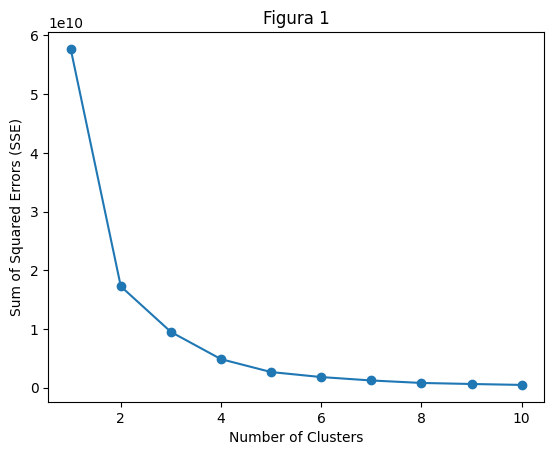

In [ ]:
def find_optimal_clusters_kmeans(data, max_k):
    sse = []  # Sum of squared errors
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10).fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Figura 1")
    plt.show()

find_optimal_clusters_kmeans(merged_df[['Libertad Economica', 'Felicidad', 'PBI', 'Esperanza de vida','Ratio de suicidios']], 10)


## Ejecución k-means clustering

In [ ]:
import plotly.express as px
from sklearn.cluster import KMeans

# Selecciona las columnas para el clustering
data = merged_df[['Libertad Economica', 'Felicidad', 'PBI', 'Esperanza de vida', 'Ratio de suicidios']].values


random_seed = 9
kmeans_3 = KMeans(n_clusters=3, random_state=random_seed, n_init=10, init='k-means++')
clusters_3 = kmeans_3.fit_predict(data)
merged_df['Cluster 3'] = clusters_3

# Configurar el gráfico para 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=random_seed, n_init=10, init='k-means++')
clusters_4 = kmeans_4.fit_predict(data)
merged_df['Cluster 4'] = clusters_4

# Cambiar los valores en la columna para que queden bien los colores en la representacion
merged_df['Cluster 4'] = merged_df['Cluster 4'].replace({1: 0, 0: 1})

## Gráficos clustering

In [ ]:
# Excluir las columnas 'Cluster 3' y 'Cluster 4'
columns_to_exclude = ['Cluster 3', 'Cluster 4']
correlation_df = merged_df.drop(columns=columns_to_exclude)

# Crear la matriz de correlación
correlation_matrix = correlation_df.corr()

# Crear el gráfico de matriz de correlación con Plotly
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale="sunset",
    annotation_text=correlation_matrix.round(2).values,
    showscale=True,
)

# Actualizar el diseño del gráfico
fig.update_layout(title="Matriz de Correlación")

# Mostrar el gráfico
fig.show()

In [ ]:
fig_3 = create_choropleth_map(merged_df, 'Cluster 3', 3, 'Mapa Mundial de Calidad de vida (3 Clusters)', [0, 1, 2], ['0', '1', '2'])
fig_3.show()

In [ ]:
create_sunburst_chart(merged_df, ['Cluster 3', 'Paises'], 'Clusterizacion en 3 grupos', 'Cluster 3', "sunset")

In [ ]:
fig_4 = create_choropleth_map(merged_df, 'Cluster 4', 4, 'Mapa Mundial de Calidad de vida (4 Clusters)', [0, 1, 2, 3], ['0', '1', '2', '3'])
fig_4.show()

In [ ]:
create_sunburst_chart(merged_df, ['Cluster 4', 'Paises'], 'Clusterizacion en 4 grupos', 'Cluster 4','sunset')